In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as dd
import hvplot.pandas

In [2]:
df = dd.read_csv('results/*.csv').compute()

In [3]:
df.head()

,chunk_size,chunking_scheme,dataset_size,machine,num_nodes,operation,runtime,worker_per_node
0,8MB,temporal,8.85 MB,cheyenne,1,global_mean,0.069896,1
1,8MB,temporal,8.85 MB,cheyenne,1,temporal_mean,0.033520,1
2,8MB,temporal,8.85 MB,cheyenne,1,climatology,0.167297,1
3,8MB,temporal,8.85 MB,cheyenne,1,anomaly,0.144948,1
4,16MB,temporal,16.72 MB,cheyenne,1,global_mean,0.042919,1


In [4]:
len(df)

8056

In [5]:
clean_df = df.groupby(['machine', 'chunk_size', 'chunking_scheme', 'dataset_size', 'num_nodes', 'operation', 'worker_per_node']).median()
clean_df.head()

runtime
machine  chunk_size chunking_scheme dataset_size num_nodes operation     worker_per_node          
cheyenne 128MB      auto            1.02 GB      1         anomaly       8                2.167397
                                                           climatology   8                0.257451
                                                           global_mean   8                0.198112
                                                           temporal_mean 8                0.189728
                                                 2         anomaly       4                2.800987

In [6]:
len(clean_df)

1292

In [15]:
clean_df.loc['cheyenne', '128MB', :, '1.02 GB'].hvplot()

:Curve   [chunking_scheme]   (runtime)

In [15]:
clean_df.hvplot()

:Curve   [machine]   (runtime)

In [6]:
def plot_results(res, operation='anomaly', worker_per_node=1):
    fig, ax = plt.subplots(figsize=(10, 6))
    chunk_sizes = res.index.get_level_values('chunk_size').unique()
    for cs, marker, color in zip(chunk_sizes, ['s', 'o', '^', '*', '>', 'D', '+'], 
                                 ['#1f77b4', '#ff7f0e', '#239B56', '#2874A6', '#873600', '#AF7AC5', '#34495E']):
        
        res.loc[cs, :, :, operation, worker_per_node].reset_index() \
           .plot(x='num_nodes', y='runtime', kind='scatter',
                                                          ax=ax, label=f'{operation} cs={cs} wpn={worker_per_node}',
                                                          color=color,marker=marker, s=50)
    ax.legend()
    ax.set_ylabel('runtime (s)')
    ax.set_xlabel('Num of nodes')
    ax.grid()
    return fig, ax

In [7]:
def plot_all(df, **kwargs):
    ops = df.index.get_level_values('operation').unique()
    for op in ops:
        plot_results(df, op, **kwargs)
    

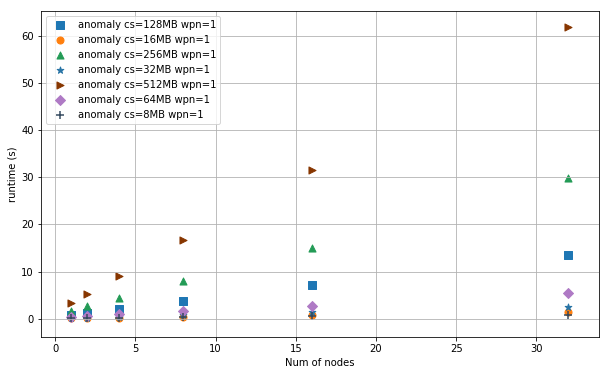

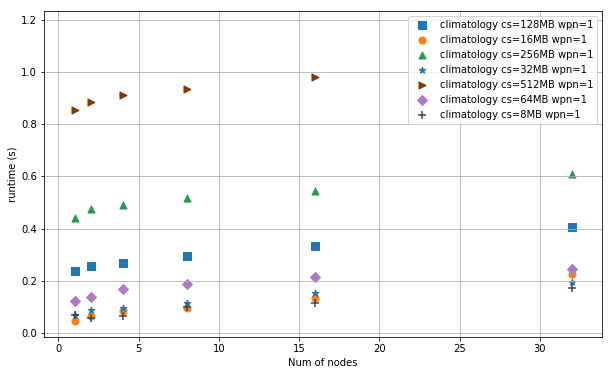

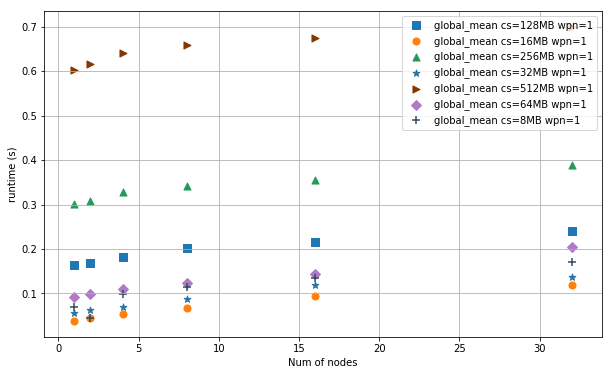

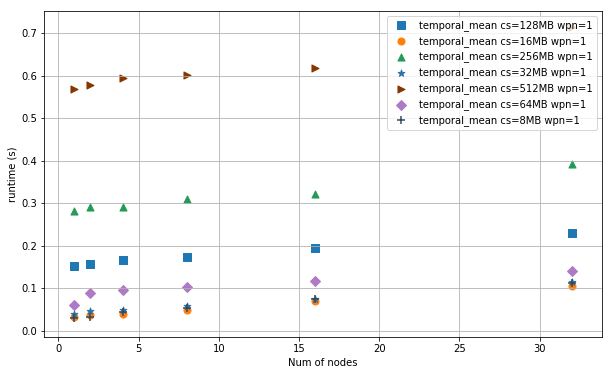

In [8]:
plot_all(clean_df, worker_per_node=1)

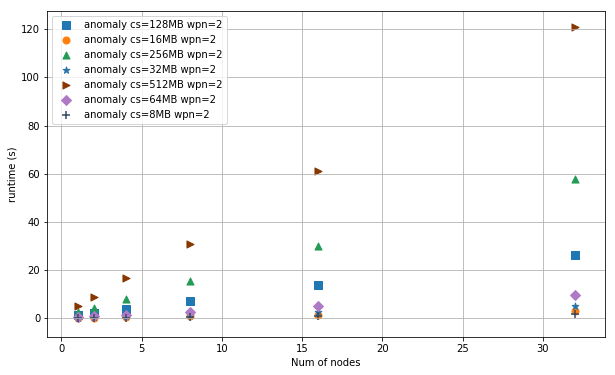

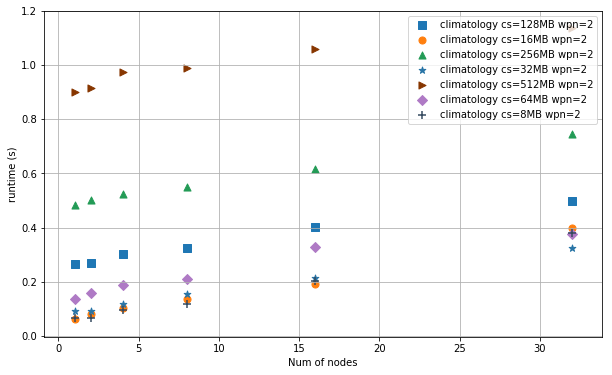

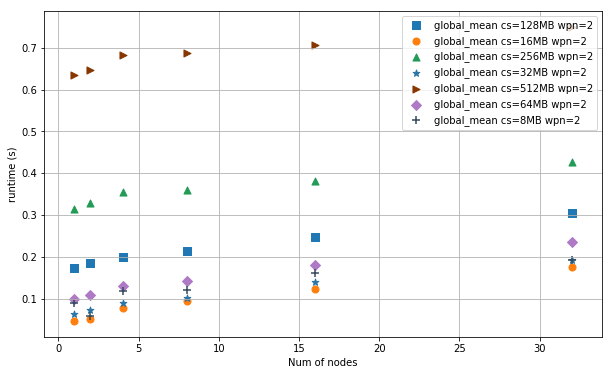

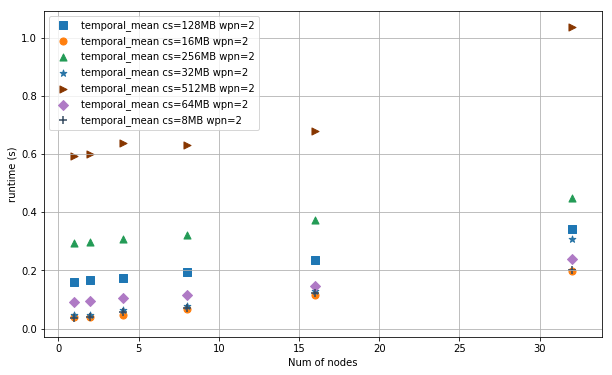

In [9]:
plot_all(clean_df, worker_per_node=2)

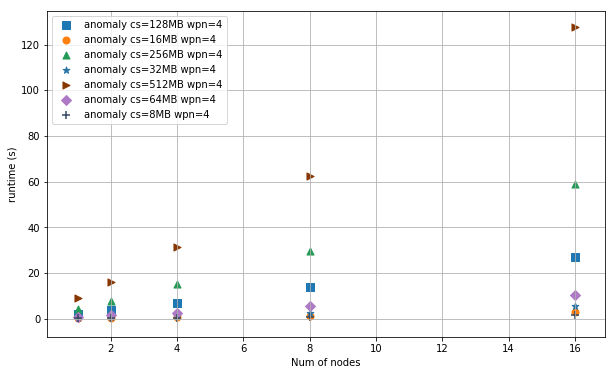

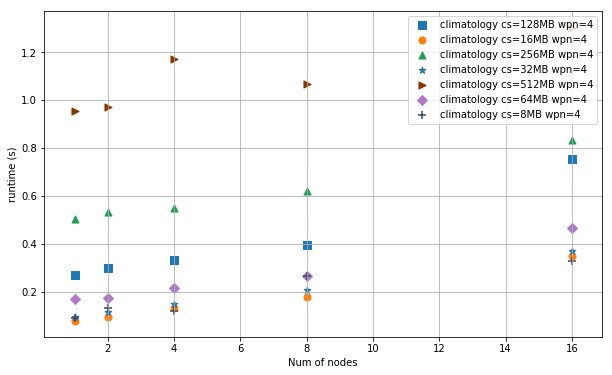

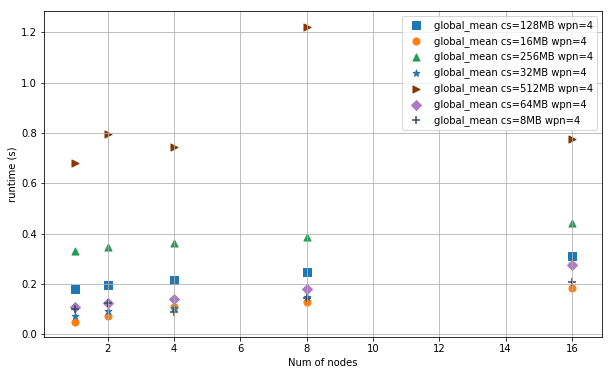

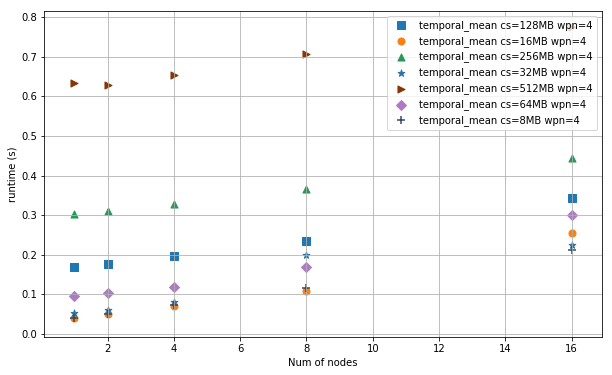

In [10]:
plot_all(clean_df, worker_per_node=4)

In [11]:
%load_ext watermark
%watermark --iversion -g  -m -v -u -d

dask       1.2.0
matplotlib 3.0.3
pandas     0.24.2
last updated: 2019-05-13 

CPython 3.7.3
IPython 7.1.1

compiler   : GCC 7.3.0
system     : Linux
release    : 3.12.62-60.64.8-default
machine    : x86_64
processor  : x86_64
CPU cores  : 72
interpreter: 64bit
Git hash   : 797e8d76ba33f94f82056555f1977c7227cd21c4
